<div class="usecase-title">Exploring Business Establishments in the City of Melbourne by ANZSIC4 Classification and CLUE Small Area</div>

<div class="usecase-authors"><b>Authored by: </b> Naga Nikhil Woopalanchi</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

write a description of the problem you are trying to solve for this use case{Using User Story format, .}

<div class="usecase-section-header">What this use case will teach you</div>

write a description of the problem you are trying to solve for this use case{Using User Story format, .}

At the end of this use case you will:
- {list the skills demonstrated in your use case}

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



# Importing Libraries

Importing the required python modules 

In [100]:
import warnings
warnings.filterwarnings("ignore")

import requests
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
from shapely.geometry import Point
import holoviews as hv
import folium

In [101]:
# Business establishments and jobs data by business size and industry

base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='business-establishments-and-jobs-data-by-business-size-and-industry'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC' }

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    # Renaming the dataset as bizsize_industry jobs 
    bizsize_industryjobs=pd.read_csv(StringIO(url_content),delimiter=';')   
    print(bizsize_industryjobs.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

   census_year               clue_small_area  \
0         2015  West Melbourne (Residential)   
1         2015  West Melbourne (Residential)   
2         2015  West Melbourne (Residential)   
3         2015  West Melbourne (Residential)   
4         2015  West Melbourne (Residential)   
5         2015  West Melbourne (Residential)   
6         2014                       Carlton   
7         2014                       Carlton   
8         2014                       Carlton   
9         2014                       Carlton   

                                   anzsic_indusrty  \
0                Health Care and Social Assistance   
1                                    Manufacturing   
2                                    Manufacturing   
3  Professional, Scientific and Technical Services   
4          Rental, Hiring and Real Estate Services   
5                                  Wholesale Trade   
6              Administrative and Support Services   
7                                     C

In [102]:
# Business establishments with address and industry classification

base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='business-establishments-with-address-and-industry-classification'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    # Renaming the dataset as bizaddressindustry
    bizaddressindustry=pd.read_csv(StringIO(url_content),delimiter=';')    
    print(bizaddressindustry.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

   census_year  block_id  property_id  base_property_id  clue_small_area  \
0         2003       105       100172            100172  Melbourne (CBD)   
1         2003       105       103301            103301  Melbourne (CBD)   
2         2003       105       103302            103302  Melbourne (CBD)   
3         2003       105       103302            103302  Melbourne (CBD)   
4         2003       105       103302            103302  Melbourne (CBD)   
5         2003       105       103302            103302  Melbourne (CBD)   
6         2003       105       103302            103302  Melbourne (CBD)   
7         2003       105       103302            103302  Melbourne (CBD)   
8         2003       105       103302            103302  Melbourne (CBD)   
9         2003       105       109319            109319  Melbourne (CBD)   

                                        trading_name  \
0                           Wilson Parking Australia   
1                Melbourne International Backpacker

In [103]:
# Street address

base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='street-addresses'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    street_add=pd.read_csv(StringIO(url_content),delimiter=';')  #renaming dataset
    print(street_add.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

                         geo_point_2d  \
0  -37.802381557572, 144.941473440919   
1  -37.816860132435, 144.969991449806   
2  -37.798830275265, 144.942872100233   
3  -37.810546771396, 144.970906397029   
4  -37.789293657657, 144.939794028368   
5  -37.800782747366, 144.951363910142   
6  -37.826775193662, 144.959358160779   
7  -37.810925617843, 144.965443591832   
8   -37.81275302482, 144.964263891172   
9   -37.821209833971, 144.95403377339   

                                           geo_shape  suburb_id   latitude  \
0  {"coordinates": [144.941473440919, -37.8023815...      592.0 -37.802382   
1  {"coordinates": [144.969991449806, -37.8168601...      591.0 -37.816860   
2  {"coordinates": [144.942872100233, -37.7988302...      592.0 -37.798830   
3  {"coordinates": [144.970906397029, -37.8105467...      591.0 -37.810547   
4  {"coordinates": [144.939794028368, -37.7892936...      592.0 -37.789294   
5  {"coordinates": [144.951363910142, -37.8007827...      592.0 -37.800783   
6 

# Preprocessing  street_add

## Street_add

A snippet of the street addresses dataset 

In [104]:
street_add.head()

,geo_point_2d,geo_shape,suburb_id,latitude,street_no,str_name,address_pnt,easting,northing,gisid,longitude,suburb,street_id,add_comp
0,"-37.802381557572, 144.941473440919","{""coordinates"": [144.941473440919, -37.8023815...",592.0,-37.802382,133,Laurens Street,133 Laurens Street North Melbourne,318773.161972,5.814115e+06,48531,144.941473,North Melbourne,781,NaN
1,"-37.816860132435, 144.969991449806","{""coordinates"": [144.969991449806, -37.8168601...",591.0,-37.816860,129,Flinders Street,129 Flinders Street Melbourne,321318.983104,5.812563e+06,37711,144.969991,Melbourne,636,NaN
2,"-37.798830275265, 144.942872100233","{""coordinates"": [144.942872100233, -37.7988302...",592.0,-37.798830,44,Macaulay Road,44 Macaulay Road North Melbourne,318887.633593,5.814512e+06,30476,144.942872,North Melbourne,847,NaN
3,"-37.810546771396, 144.970906397029","{""coordinates"": [144.970906397029, -37.8105467...",591.0,-37.810547,13,Punch Lane,13 Punch Lane Melbourne,321384.307636,5.813265e+06,35165,144.970906,Melbourne,1003,NaN
4,"-37.789293657657, 144.939794028368","{""coordinates"": [144.939794028368, -37.7892936...",592.0,-37.789294,61,Racecourse Road,61 Racecourse Road North Melbourne,318593.277492,5.815564e+06,22247,144.939794,North Melbourne,119624,NaN


In [105]:
street_add.shape

(63721, 14)

The street address dataset has a total of 63,721 records with a total of 14 features.

In [106]:
street_add.columns

Index(['geo_point_2d', 'geo_shape', 'suburb_id', 'latitude', 'street_no',
       'str_name', 'address_pnt', 'easting', 'northing', 'gisid', 'longitude',
       'suburb', 'street_id', 'add_comp'],
      dtype='object')

A list of all features in the street address dataset. 


In [107]:
street_add = street_add.drop(['geo_point_2d','geo_shape','easting','northing','gisid'],axis=1)

From observing the data snippets, we have remove the following features from the data:
1. geo_point_2d
2. geo_shape
3. easting
4. northing
5. gisid


below is a snippet of the dataset. 

In [108]:
street_add

,suburb_id,latitude,street_no,str_name,address_pnt,longitude,suburb,street_id,add_comp
0,592.0,-37.802382,133,Laurens Street,133 Laurens Street North Melbourne,144.941473,North Melbourne,781,NaN
1,591.0,-37.816860,129,Flinders Street,129 Flinders Street Melbourne,144.969991,Melbourne,636,NaN
2,592.0,-37.798830,44,Macaulay Road,44 Macaulay Road North Melbourne,144.942872,North Melbourne,847,NaN
3,591.0,-37.810547,13,Punch Lane,13 Punch Lane Melbourne,144.970906,Melbourne,1003,NaN
4,592.0,-37.789294,61,Racecourse Road,61 Racecourse Road North Melbourne,144.939794,North Melbourne,119624,NaN
...,...,...,...,...,...,...,...,...,...
63716,0.0,-37.799002,190,Nicholson Street,190 Nicholson Street,144.974876,NaN,931,NaN
63717,591.0,-37.812386,109,Bourke Street,109 Bourke Street Melbourne,144.970012,Melbourne,455,NaN
63718,590.0,-37.790814,23,McConnell Street,23 McConnell Street Kensington,144.928709,Kensington,119634,NaN
63719,590.0,-37.793947,516A,Macaulay Road,516A Macaulay Road Kensington,144.929064,Kensington,847,NaN


## handling missing values

In [109]:
street_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63721 entries, 0 to 63720
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   suburb_id    63715 non-null  float64
 1   latitude     63721 non-null  float64
 2   street_no    63069 non-null  object 
 3   str_name     63720 non-null  object 
 4   address_pnt  63721 non-null  object 
 5   longitude    63721 non-null  float64
 6   suburb       62991 non-null  object 
 7   street_id    63721 non-null  int64  
 8   add_comp     1352 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.4+ MB


A detailed description about the dataset with datatype and the number of total entries for each feature.

In [110]:
street_add.isna().sum()

suburb_id          6
latitude           0
street_no        652
str_name           1
address_pnt        0
longitude          0
suburb           730
street_id          0
add_comp       62369
dtype: int64

The above code indicates a total of number of null entries (empty values or null values) in the dataset. 

In the street address dataset, the feature 'add_comp' has  total of 62,369 missing values which is more than half entries.

### Handing missing values for 'add_comp' column

With more than half of the values missing for this column dropping this column


In [111]:
street_add = street_add.drop('add_comp',axis = 1)

observing the row with missing values or the suburb_id is zero

In [112]:
suburb_id_nan = street_add[street_add['suburb_id'].isna()]

suburb_id_nan

,suburb_id,latitude,street_no,str_name,address_pnt,longitude,suburb,street_id
15724,NaN,-37.825995,50,Normanby Road,50 Normanby Road,144.955261,NaN,1368
26136,NaN,-37.827486,126,Normanby Road,126 Normanby Road,144.952721,NaN,1368
29528,NaN,-37.827525,130,Normanby Road,130 Normanby Road,144.952561,NaN,1368
34191,NaN,-37.827506,128,Normanby Road,128 Normanby Road,144.952641,NaN,1368
55077,NaN,-37.827467,124,Normanby Road,124 Normanby Road,144.952801,NaN,1368
57013,NaN,-37.826040,52,Normanby Road,52 Normanby Road,144.955198,NaN,1368


In [113]:
suburb_id_zero= street_add[street_add['suburb'].isna()]

suburb_id_zero

,suburb_id,latitude,street_no,str_name,address_pnt,longitude,suburb,street_id
20,0.0,-37.788135,772,Lygon Street,772 Lygon Street,144.969279,NaN,840
61,0.0,-37.827770,165,Normanby Road,165 Normanby Road,144.951017,NaN,1368
85,0.0,-37.786158,42,Leonard Crescent,42 Leonard Crescent,144.906459,NaN,1313
118,0.0,-37.804792,68,Nicholson Street,68 Nicholson Street,144.973896,NaN,931
559,0.0,-37.775535,951,Park Street,951 Park Street,144.940570,NaN,962
...,...,...,...,...,...,...,...,...
63124,0.0,-37.781990,34,Langs Road,34 Langs Road,144.908970,NaN,1312
63127,0.0,-37.780382,62,Bowen Crescent,62 Bowen Crescent,144.962916,NaN,457
63235,0.0,-37.784645,10,Garton Street,10 Garton Street,144.963762,NaN,648
63390,0.0,-37.785339,465,Lygon Street,465 Lygon Street,144.969403,NaN,840


We can observe the from both the snippets address for unknown suburb names the suburb id is either 0 or NaN. Hence, we replace the suburb id with 0. 

In [114]:
street_add['suburb_id'] = street_add['suburb_id'].fillna(0)

Additionally, we replace the suburb name with suburb id 0 to unkown suburb.

In [115]:
street_add['suburb'] = street_add['suburb'].fillna('unknown suburb')

Futhermore, we have also replaced the missing values in street number with 0.

In [116]:
street_add['street_no']= street_add['street_no'].fillna(0)

Now, to handle the missing values in the street name, we first observe the row with missing street name. 

In [117]:
street_name = street_add[street_add['str_name'].isna()]

street_name

,suburb_id,latitude,street_no,str_name,address_pnt,longitude,suburb,street_id
58476,592.0,-37.796995,5,NaN,5 North Melbourne,144.95,North Melbourne,2931


And replace the missing name with name with unknown street name.

In [118]:
street_add['str_name'] = street_add['str_name'].fillna('unknow street_name')

A re-check on the total number of missing values in the street address dataset and with this we have concluded there are no more missing values in the street address dataset.

In [119]:
street_add.isna().sum()

suburb_id      0
latitude       0
street_no      0
str_name       0
address_pnt    0
longitude      0
suburb         0
street_id      0
dtype: int64

### Handling datatypes

A recap on the datatypes of the street address dataset.

In [120]:
street_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63721 entries, 0 to 63720
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   suburb_id    63721 non-null  float64
 1   latitude     63721 non-null  float64
 2   street_no    63721 non-null  object 
 3   str_name     63721 non-null  object 
 4   address_pnt  63721 non-null  object 
 5   longitude    63721 non-null  float64
 6   suburb       63721 non-null  object 
 7   street_id    63721 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 3.9+ MB


correcting the datatype from the dataset, subrurb_id should be int datatype not float.

In [121]:
street_add['suburb_id'] = street_add['suburb_id'].apply(np.int64)

In [122]:
street_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63721 entries, 0 to 63720
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   suburb_id    63721 non-null  int64  
 1   latitude     63721 non-null  float64
 2   street_no    63721 non-null  object 
 3   str_name     63721 non-null  object 
 4   address_pnt  63721 non-null  object 
 5   longitude    63721 non-null  float64
 6   suburb       63721 non-null  object 
 7   street_id    63721 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.9+ MB


Now for a deeper understanding of the street address dataset. we need to identify suburb id and respective suburb it represent. 

In [123]:
#Creating a dictionary for suburb_id and suburb name 

suburb_dict = dict(zip(street_add['suburb_id'], street_add['suburb']))

suburb_dict

{592: 'North Melbourne',
 591: 'Melbourne',
 596: 'Southbank',
 599: 'Docklands',
 597: 'West Melbourne',
 593: 'Parkville',
 585: 'Carlton',
 587: 'East Melbourne',
 590: 'Kensington',
 0: 'unknown suburb',
 594: 'Port Melbourne',
 588: 'Flemington',
 595: 'South Yarra',
 586: 'Carlton North',
 840: 'South Wharf'}

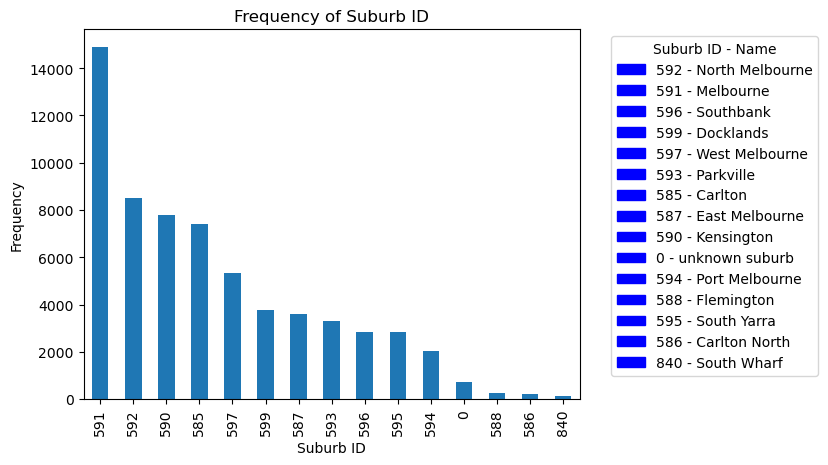

In [124]:

#Frequenct counts for each suburbs 
suburb_counts = street_add['suburb_id'].value_counts()

# Define fig and ax using plt.subplots()
fig, ax = plt.subplots()  
suburb_counts.plot(kind='bar', ax=ax)  
plt.xlabel('Suburb ID')
plt.ylabel('Frequency')
plt.title('Frequency of Suburb ID')

# Handle for legend
handles = [mpatches.Patch(color='blue', label=f'{id} - {name}') for id, name in suburb_dict.items()]
plt.legend(handles=handles, title="Suburb ID - Name", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

This chart shows how often different suburb, labeled by suburb id , appear in street address dataset. The bars represent different suburb around Melbourne, with the tallest bars for Melbourne and North Melbourne—showing that we have more information or activities recorded there. Areas represented by smaller bars are mentioned less often. On the right, there's a list that tells you which number corresponds to which area, helping you understand exactly where each number points to on the map. This visualization helps us see which parts of the city are most frequently noted in our data.

## bizsize_industryjobs

A snippet of the bizsie industry jobs,

The bizsize_industryjobs dataset, contains information about businessess and employment during the census year starting from 2002.


In [125]:
bizsize_industryjobs.head()

,census_year,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
0,2015,West Melbourne (Residential),Health Care and Social Assistance,Health Care and Social Assistance,Large business,1,NaN
1,2015,West Melbourne (Residential),Manufacturing,Manufacturing,Medium business,5,171.0
2,2015,West Melbourne (Residential),Manufacturing,Manufacturing,Non employing,1,NaN
3,2015,West Melbourne (Residential),"Professional, Scientific and Technical Services",Business Services,Non employing,3,0.0
4,2015,West Melbourne (Residential),"Rental, Hiring and Real Estate Services",Real Estate Services,Small business,5,42.0


Sorting by 'census_year' organizes the data chronologically, making it easier to analyze trends and patterns over time.

In [126]:
# Sorting the dataset from ascending order 
bizsize_industryjobs = bizsize_industryjobs.sort_values(by = 'census_year',ascending = True)

In [127]:
#Shape of the dataset
bizsize_industryjobs.shape

(14692, 7)

The bizsize_industryjobs dataset has a total of 14,692 records with a total of 7 features. 

A detailed investigation of the features in the  dataset. 

In [128]:
# Different features in the dataset. 
bizsize_industryjobs.columns


Index(['census_year', 'clue_small_area', 'anzsic_indusrty', 'clue_industry',
       'business_size', 'total_establishments', 'total_jobs'],
      dtype='object')

In [129]:
#The different values in census_year

bizsize_industryjobs['census_year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

The bizsize_industryjobs dataset has a record starting from the year 2002 till 2022.

In [130]:
#Different suburbs
bizsize_cluesmallarea = bizsize_industryjobs['clue_small_area'].unique()

bizsize_cluesmallarea

array(['Melbourne (CBD)', 'City of Melbourne (total)',
       'West Melbourne (Residential)', 'Docklands', 'Carlton',
       'Port Melbourne', 'South Yarra', 'North Melbourne', 'Parkville',
       'Southbank', 'West Melbourne (Industrial)', 'East Melbourne',
       'Kensington', 'Melbourne (Remainder)'], dtype=object)

The following dataset has records from different suburbs defined by the Clue small area. 

In [131]:
#Different industries defined by anzsic 
bizsize_anzsic =bizsize_industryjobs['anzsic_indusrty'].unique()
bizsize_anzsic

array(['Public Administration and Safety', 'Construction',
       'Education and Training',
       'Electricity, Gas, Water and Waste Services',
       'Financial and Insurance Services',
       'Health Care and Social Assistance', 'Manufacturing', 'Mining',
       'Other Services',
       'Professional, Scientific and Technical Services',
       'Rental, Hiring and Real Estate Services',
       'Arts and Recreation Services',
       'Administrative and Support Services', 'Retail Trade',
       'Transport, Postal and Warehousing', 'Wholesale Trade',
       'Accommodation and Food Services',
       'Agriculture, Forestry and Fishing',
       'Information Media and Telecommunications', 'All ANZSIC'],
      dtype=object)

In [132]:
# Different insutry classified by CLUE small area
bizsize_clueindustry = bizsize_industryjobs['clue_industry'].unique()
bizsize_clueindustry

array(['Public Administration and Safety', 'Construction',
       'Education and Training',
       'Electricity, Gas, Water and Waste Services',
       'Finance and Insurance', 'Health Care and Social Assistance',
       'Manufacturing', 'Agriculture and Mining', 'Other Services',
       'Business Services', 'Real Estate Services',
       'Arts and Recreation Services', 'Admin and Support Services',
       'Rental and Hiring Services', 'Retail Trade',
       'Transport, Postal and Storage', 'Wholesale Trade',
       'Accommodation', 'Food and Beverage Services',
       'Information Media and Telecommunications', 'All CLUE Industry'],
      dtype=object)

In [133]:
# Different busines size
bizsize_industryjobs['business_size'].unique()

array(['Non employing', 'Medium business', 'Small business',
       'Large business'], dtype=object)

The bizsize_industryjobs dataset describes the records of different business size and number of jobs been employed by them.

In [134]:
#Describing the dataset. 

bizsize_industryjobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 7345 to 9761
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   census_year           14692 non-null  int64  
 1   clue_small_area       14692 non-null  object 
 2   anzsic_indusrty       14692 non-null  object 
 3   clue_industry         14692 non-null  object 
 4   business_size         14692 non-null  object 
 5   total_establishments  14692 non-null  int64  
 6   total_jobs            10365 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 918.2+ KB


In [135]:
bizsize_industryjobs.isna().sum()

census_year                0
clue_small_area            0
anzsic_indusrty            0
clue_industry              0
business_size              0
total_establishments       0
total_jobs              4327
dtype: int64

Handling missing vaues

The bizsize_industryjobs dataset has a total of 4327 entries missing. To handle the missing value, we decide to replace the missing value with min value based on the type of business size. 

In [136]:
# Descriptive statistic by grouping different business size
business_size_descriptive = bizsize_industryjobs.groupby('business_size')['total_jobs'].describe()

business_size_descriptive

,count,mean,std,min,25%,50%,75%,max
business_size,,,,,,,,
Large business,1076.0,12633.487918,32292.079142,687.0,2084.5,3882.0,11539.25,273200.0
Medium business,3095.0,2418.815509,10420.953933,66.0,222.5,409.0,1267.00,153302.0
Non employing,1720.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Small business,4474.0,984.121144,5117.223702,3.0,48.0,108.0,393.50,80008.0


In [137]:
# Replacing missing value with min value based on business size
bizsize_industryjobs['total_jobs'] = bizsize_industryjobs.groupby('business_size')['total_jobs'].transform(lambda x: x.fillna(x.min()))

In [138]:
# bizsize_industryjobs dataset info

bizsize_industryjobs.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 7345 to 9761
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   census_year           14692 non-null  int64  
 1   clue_small_area       14692 non-null  object 
 2   anzsic_indusrty       14692 non-null  object 
 3   clue_industry         14692 non-null  object 
 4   business_size         14692 non-null  object 
 5   total_establishments  14692 non-null  int64  
 6   total_jobs            14692 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 918.2+ KB


Handling the biszize_industryjobs to correct datatypes

In [139]:
# Changing the data type for  total number of jobs
bizsize_industryjobs['total_jobs'] = bizsize_industryjobs['total_jobs'].apply(np.int64)

## bizaddressindustry

 A snippet of the bizaddressinsudtry dataset

In [140]:
bizaddressindustry.head()

,census_year,block_id,property_id,base_property_id,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,longitude,latitude
0,2003,105,100172,100172,Melbourne (CBD),Wilson Parking Australia,24-46 A'Beckett Street MELBOURNE 3000,9533,Parking Services,144.962053,-37.808573
1,2003,105,103301,103301,Melbourne (CBD),Melbourne International Backpackers,442-450 Elizabeth Street MELBOURNE 3000,4400,Accommodation,144.960868,-37.808309
2,2003,105,103302,103302,Melbourne (CBD),Vacant,422-440 Elizabeth Street MELBOURNE 3000,0,Vacant Space,144.961017,-37.808630
3,2003,105,103302,103302,Melbourne (CBD),The Garden Cafe,"Shop 3, Ground , 422-440 Elizabeth Street MELB...",4511,Cafes and Restaurants,144.961017,-37.808630
4,2003,105,103302,103302,Melbourne (CBD),Telephony Australia,"Shop 5, Ground , 422-440 Elizabeth Street MELB...",5809,Other Telecommunications Services,144.961017,-37.808630


A detailed investigation into bizaddressindustry dataset


In [141]:
bizaddressindustry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374210 entries, 0 to 374209
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   census_year                   374210 non-null  int64  
 1   block_id                      374210 non-null  int64  
 2   property_id                   374210 non-null  int64  
 3   base_property_id              374210 non-null  int64  
 4   clue_small_area               374210 non-null  object 
 5   trading_name                  374083 non-null  object 
 6   business_address              374209 non-null  object 
 7   industry_anzsic4_code         374210 non-null  int64  
 8   industry_anzsic4_description  374210 non-null  object 
 9   longitude                     369425 non-null  float64
 10  latitude                      369425 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 31.4+ MB


In [142]:
bizaddressindustry.shape

(374210, 11)

The bizaddressindustry has a total of 374,210 records with 11 features.

In [143]:
# Sorting the dataset in ascending order 
bizaddressindustry=bizaddressindustry.sort_values(by='census_year',ascending = True)

In [144]:
#list of all features in bizaddressindustry dataset
bizaddressindustry.columns

Index(['census_year', 'block_id', 'property_id', 'base_property_id',
       'clue_small_area', 'trading_name', 'business_address',
       'industry_anzsic4_code', 'industry_anzsic4_description', 'longitude',
       'latitude'],
      dtype='object')

In [145]:
# Different census_year
bizaddress_censusyear = bizaddressindustry['census_year'].unique()

bizaddress_censusyear

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

This dataset address a detail description of business and a classification according Clue small area and anzsic4 description starting from the year 2002 till 2022.

In [146]:
#Different block_id
bizaddressindustry['block_id'].unique()

array([ 748,   78,   77,   74,   76,   82,   81,   73,   72,   85,   93,
         92,   91,   87,   84,   83,   64,   63,   62,   57,   58,   61,
         67,   66,   68,   71,   65,   94,  242,  241,  240,  239,  237,
        226,  227,  228,  229,  230,  232,  234,  236,  246,  245,  243,
        218,  217,  223,  224,  225,  222,  220,  219,  260,  259,  258,
        257,  255,  256,  267,  266,  265,  264,  261,  262,  263,  251,
        248,  247,  252,  254,  105,  104,  103,  101,  113,  107,  111,
         98,   97,   95,   96,  210,  207,  206,  205,  212,  213,  216,
        215,  204,  214,  203,  201,  114,  125,  131,  116,  115,   35,
         38,   37,   36,   32,   33,   31,   28,   34,   53,   52,   51,
         47,   46,   48,   56,   54,   55,   43,   42,   44,   41,   45,
        803,  802,  801,  795,  808,  807,  806,  804,  794,  793,  784,
        783,  782,  781,  779,  791,  790,  792,  785,  786,  787,  789,
        788,  778,  920,  919,  916,  915,  870,  9

In [147]:
#Different property id
bizaddressindustry['property_id'].unique()

array([108658, 103618, 105752, ..., 714182, 714412, 511130], dtype=int64)

In [148]:
#different base property id
bizaddressindustry['base_property_id'].unique()

array([108658, 103618, 110709, ..., 102196, 714412, 511130], dtype=int64)

In [149]:
# Different business industry classified according to CLUE small area 
bizaddress_cluesmallarea = bizaddressindustry['clue_small_area'].unique()

bizaddress_cluesmallarea

array(['Southbank', 'Melbourne (CBD)', 'West Melbourne (Residential)',
       'Carlton', 'Docklands', 'Port Melbourne', 'Parkville',
       'Melbourne (Remainder)', 'West Melbourne (Industrial)',
       'South Yarra', 'East Melbourne', 'North Melbourne', 'Kensington'],
      dtype=object)

In [150]:
#Different anzic4 code 
bizaddressindustry['industry_anzsic4_code'].unique()

array([   0, 4511, 9531, 4512, 5801, 7220, 1611, 6999, 4129, 8101, 5101,
       9551, 6720, 4520, 3211, 7000, 6931, 4810, 4271, 9540, 4279, 8102,
       7299, 9511, 9559, 6411, 6932, 6230, 7510, 6924, 4400, 4213, 6419,
       5419, 6921, 1191, 7520, 6330, 4211, 3912, 4242, 4241, 7540, 9533,
       9001, 1510, 7714, 5299, 8219, 6961, 5809, 9002, 8599, 8512, 4252,
       8532, 4255, 4273, 4244, 4258, 4251, 4243, 4257, 4710, 4110, 9552,
       9539, 8922, 6923, 9422, 8531, 2620, 2491, 3231, 6922, 4221, 2640,
       4530, 2599, 9411, 6221, 7711, 4274, 6962, 4253, 4259, 4214, 3494,
       1351, 2700, 1333, 9491, 7211, 3732, 1523, 8511, 8220, 6940, 7552,
       5910, 5922, 5309, 9003, 8790, 5413, 4111, 6950, 3339, 3019, 5411,
       7291, 4123, 4260, 5513, 6991, 5420, 6223, 5610, 8212, 3739, 9114,
       3711, 3299, 6420, 4121, 8520, 4623, 3332, 8539, 2591, 8710, 1912,
       3605, 9419, 7311, 8021, 7600, 8537, 4222, 6632, 6611, 3419, 3921,
       4122, 4272, 4000, 2010, 6925, 9111, 1620, 95

In [151]:
bizaddressindustry_anzsic4_desc = bizaddressindustry['industry_anzsic4_description'].unique()

bizaddressindustry_anzsic4_desc

array(['Vacant Space', 'Cafes and Restaurants',
       'Laundry and Dry-Cleaning Services', 'Takeaway Food Services',
       'Wired Telecommunications Network Operation',
       'Travel Agency and Tour Arrangement Services', 'Printing',
       'Other Professional, Scientific and Technical Services n.e.c.',
       'Other Specialised Food Retailing',
       'Technical and Vocational Education and Training',
       'Postal Services',
       'Business and Professional Association Services',
       'Real Estate Services', 'Pubs, Taverns and Bars',
       'Land Development and Subdivision',
       'Computer System Design and Related Services', 'Legal Services',
       'Water Freight Transport',
       'Pharmaceutical, Cosmetic and Toiletry Goods Retailing',
       'Religious Services', 'Other Store-Based Retailing n.e.c.',
       'Higher Education', 'Other Administrative Services n.e.c.',
       'Hairdressing and Beauty Services',
       'Other Interest Group Services n.e.c.',
       'Financ

In [152]:
#Creating a ANZSIC4 description dictonary
anzsic4_dict  = dict(zip(bizaddressindustry['industry_anzsic4_code'], bizaddressindustry['industry_anzsic4_description']))

anzsic4_dict

{0: 'Vacant Space',
 4511: 'Cafes and Restaurants',
 9531: 'Laundry and Dry-Cleaning Services',
 4512: 'Takeaway Food Services',
 5801: 'Wired Telecommunications Network Operation',
 7220: 'Travel Agency and Tour Arrangement Services',
 1611: 'Printing',
 6999: 'Other Professional, Scientific and Technical Services n.e.c.',
 4129: 'Other Specialised Food Retailing',
 8101: 'Technical and Vocational Education and Training',
 5101: 'Postal Services',
 9551: 'Business and Professional Association Services',
 6720: 'Real Estate Services',
 4520: 'Pubs, Taverns and Bars',
 3211: 'Land Development and Subdivision',
 7000: 'Computer System Design and Related Services',
 6931: 'Legal Services',
 4810: 'Water Freight Transport',
 4271: 'Pharmaceutical, Cosmetic and Toiletry Goods Retailing',
 9540: 'Religious Services',
 4279: 'Other Store-Based Retailing n.e.c.',
 8102: 'Higher Education',
 7299: 'Other Administrative Services n.e.c.',
 9511: 'Hairdressing and Beauty Services',
 9559: 'Other I

### Handling missing values

In [153]:
#dataset description 
bizaddressindustry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374210 entries, 198360 to 318285
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   census_year                   374210 non-null  int64  
 1   block_id                      374210 non-null  int64  
 2   property_id                   374210 non-null  int64  
 3   base_property_id              374210 non-null  int64  
 4   clue_small_area               374210 non-null  object 
 5   trading_name                  374083 non-null  object 
 6   business_address              374209 non-null  object 
 7   industry_anzsic4_code         374210 non-null  int64  
 8   industry_anzsic4_description  374210 non-null  object 
 9   longitude                     369425 non-null  float64
 10  latitude                      369425 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 34.3+ MB


In [154]:
#bizaddressindustry dataset missing values
bizaddressindustry.isna().sum()

census_year                        0
block_id                           0
property_id                        0
base_property_id                   0
clue_small_area                    0
trading_name                     127
business_address                   1
industry_anzsic4_code              0
industry_anzsic4_description       0
longitude                       4785
latitude                        4785
dtype: int64

In [155]:
#Replacing the missing trading name and business industry with unknown name
bizaddressindustry['trading_name'] = bizaddressindustry['trading_name'].fillna('unknown name')

bizaddressindustry['business_address'] = bizaddressindustry['business_address'].fillna('unknown address')

# Working area 

In [156]:
#Converting the dataframe to geodataframe 
gdf = gpd.GeoDataFrame(street_add, geometry = gpd.points_from_xy(street_add.longitude,street_add.latitude),crs = "EPSG:4326")

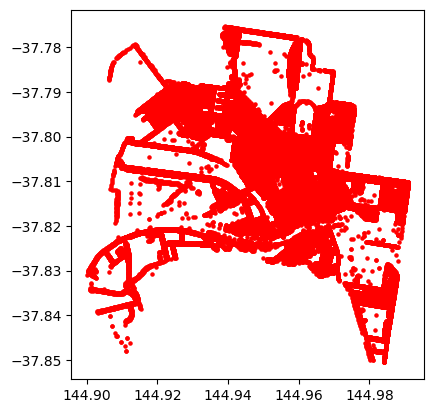

In [157]:
gdf = gpd.GeoDataFrame(street_add, geometry = gpd.points_from_xy(street_add.longitude,street_add.latitude),crs = "EPSG:4326")
gdf.head()
gdf.plot(marker = 'o',color = 'red', markersize =5)

plt.show()

In [160]:
import folium

m = folium.Map(location=[gdf['latitude'].mean(),
                        gdf['longitude'].mean()],zoom_start=12)

def add_point_to_map(row):
    folium.Marker(
    location = (row['latitude'],row['longitude']),
    popup=f"{row['str_name']},{row['suburb']}").add_to(m)

gdf.apply(add_point_to_map,axis=1)



0        None
1        None
2        None
3        None
4        None
         ... 
63716    None
63717    None
63718    None
63719    None
63720    None
Length: 63721, dtype: object